## Time-Frequency Analysis 

$\Rightarrow$ It deals with the non-stationary signals.

#### 1. Short-Time Fourier Transform (STFT):

$$\textbf{STFT}\left \{ x\left ( t \right ) \right \}\left ( \tau ,\omega  \right )=X\left ( \tau ,\omega  \right )=\int_{-\infty }^{\infty }x\left ( t \right )w\left ( t-\tau  \right )e^{-j\omega t}dt$$

where w(t) is the window function.

#### 2. Discrete STFT :

$$\textbf{STFT}\left \{ x[n] \right \}\left ( m ,\omega  \right )=X\left ( m ,\omega  \right )=\sum_{n=-\infty }^{\infty }x[n]\ w[n-m]\ e^{-j\omega n}$$

where w[n] is the window function.

#### 3. Time-frequency representation

- **Spectrogram:**

  $$|X\left ( m, \omega  \right )|^{2}$$

  where $X\left ( m, \omega  \right )$ is the STFT result.


- Solution for STFT resolution problem: **Wavelet transforms**

  (1) In high frequency regions, it has a better temporal resolution.
  
  (2) In low frequency regions, it has a better frequency resolution.

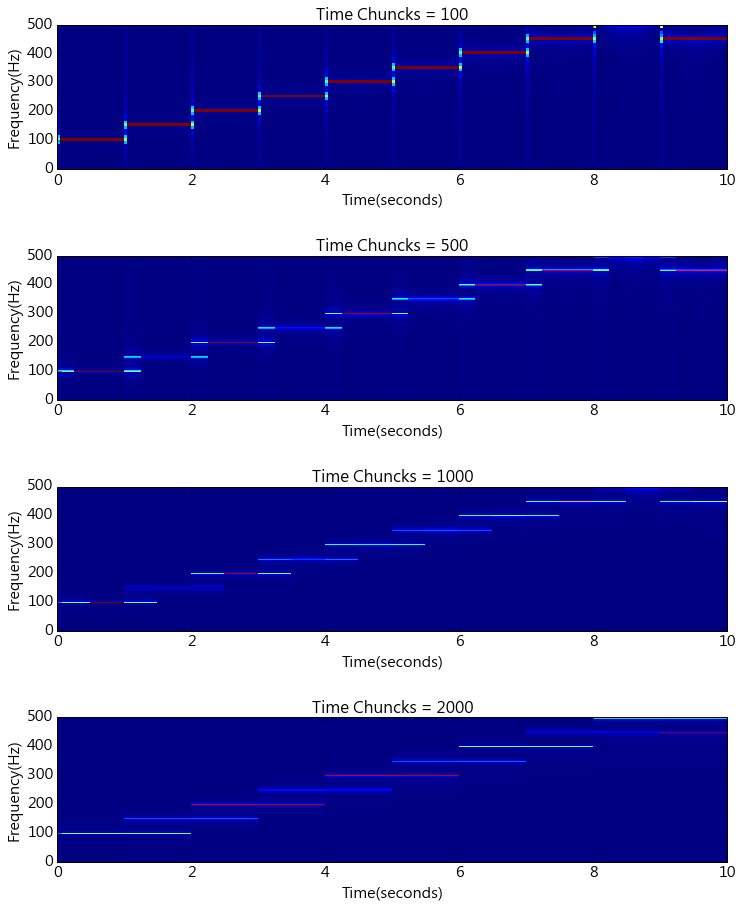

In [1]:
%matplotlib inline
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

fs = 1000
t = np.linspace(0, 1, fs)

#x = signal.chirp(t, 0, 1, 500, "quadratic")

x = np.array([])
for i in range(10):
    segment = np.cos(2 * np.pi * ((i + 2) * 50) * t)
    x = np.append(x, segment)

time_chuncks = np.array([100, 500, 1000, 2000])

fig, axes = plt.subplots(time_chuncks.size, 1, figsize=(12, 15))
plt.subplots_adjust(hspace = 0.6)
for i  in range(time_chuncks.size):
    # method 1: STFT 
    f, t, Zxx = signal.stft(x, fs, window = 'boxcar', nperseg = time_chuncks[i])
    # method 2: Spectrogram
    # f, t, Zxx = signal.spectrogram(x, fs)
    axes[i].pcolormesh(t, f, abs(Zxx))
    axes[i].set_xlabel("Time(seconds)", fontsize = 15)
    axes[i].set_ylabel("Frequency(Hz)", fontsize = 15)
    axes[i].set_title("Time Chuncks = " + str(time_chuncks[i]), fontsize = 16)
    axes[i].set_ylim(0, 500)
    axes[i].tick_params(axis = 'both', labelsize = 15)

#### 4. Example: audio signals

- Music source: https://www.bensound.com/royalty-free-music/track/jazzy-frenchy

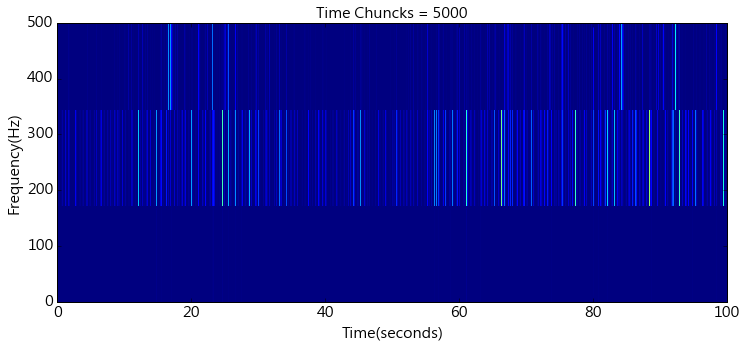

In [2]:
%matplotlib inline
import numpy as np
import scipy.signal as signal
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

infile = "bensound-jazzyfrenchy (online-audio-converter.com).wav"
fs, x = read(infile)

# method 1: STFT 
#f1, t1, Zxx1 = signal.stft(x[:, 0], fs, nperseg = 5000)
#f2, t2, Zxx2 = signal.stft(x[:, 1], fs, nperseg = 5000)

# method 2: Spectrogram
f1, t1, Zxx1 = signal.spectrogram(x[:, 0], fs)
f2, t2, Zxx2 = signal.spectrogram(x[:, 1], fs)

fig, ax = plt.subplots(figsize=(12, 5))
ax.pcolormesh(t1, f1, abs(Zxx1))
ax.pcolormesh(t2, f2, abs(Zxx2))
ax.set_xlabel("Time(seconds)", fontsize = 15)
ax.set_ylabel("Frequency(Hz)", fontsize = 15)
ax.set_title("Time Chuncks = 5000", fontsize = 15)
ax.set_xlim(0, 100)
ax.set_ylim(0, 500)
ax.tick_params(axis = 'both', labelsize = 15)